<a href="https://colab.research.google.com/github/venkatesh-manikumar/Datascience-Assignments/blob/main/Loan_Default_Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
from google.colab import drive
#drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/DataScience/Loan_Default.csv')

**Numerical features**

In [71]:
data.select_dtypes(include = np.number).head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890,2019,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,24891,2019,206500,NaN,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,24892,2019,406500,4.56,0.2000,595.0,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,24893,2019,456500,4.25,0.6810,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,24894,2019,696500,4.00,0.3042,0.0,360.0,758000.0,10440.0,602,91.886544,0,39.0


**Categorical features**

In [72]:
data.select_dtypes(include = 'object').head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


In [4]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [5]:
data.shape

(148670, 34)

**Upfront_charges , rate_of_interest and Interest_rate_spread	have > 20 % missing data**

In [42]:
total = data.shape[0]
x = data.isna().sum().sort_values(ascending = False).apply(lambda x:(x/total)*100).reset_index().set_axis(['columns','missing_percentage'], axis="columns")
x[x.missing_percentage > 0]

,columns,missing_percentage
0,Upfront_charges,26.664425
1,Interest_rate_spread,24.644515
2,rate_of_interest,24.509989
3,dtir1,16.224524
4,property_value,10.155378
5,LTV,10.155378
6,income,6.154571
7,submission_of_application,0.134526
8,age,0.134526
9,Neg_ammortization,0.081388


**ID - Just a identifier data** - No missing data

In [7]:
data['ID'].nunique()

148670

**Year - Data is based on the year 2019** -  No missing data



In [8]:
data['year'].nunique() , data['year'].unique() , data['ID'].count()

(1, array([2019]), 148670)

**loan_limit - Have missing data**

*   CF - Conforming - Less interest rates , Less amount
*   NCF - Non-conforming - High interest rates , Higher amount

In [9]:
data['loan_limit'].fillna('-1',inplace = True)
data['loan_limit'].value_counts()


cf     135348
ncf      9978
-1       3344
Name: loan_limit, dtype: int64

**Loan amount (Min,Max,Median) for missing Loan_limit values resembles behaviour of conforming loan , hence filling missing values as 'cf'**

In [10]:
data.groupby(by = ['loan_limit']).\
agg(median_loan_amount = ('loan_amount',np.median) , min_loan_amount = ('loan_amount' , np.min),mean_loan_amount = ('loan_amount' , np.mean) ,  max_loan_amount = ('loan_amount' , np.max) )


,median_loan_amount,min_loan_amount,mean_loan_amount,max_loan_amount
loan_limit,,,,
-1,286500.0,36500,314415.669856,1356500
cf,296500.0,16500,317438.395839,1396500
ncf,486500.0,36500,522270.695530,3576500


In [11]:
data['loan_limit'].replace({'-1':'cf'},inplace = True)
data['loan_limit'].value_counts()

cf     138692
ncf      9978
Name: loan_limit, dtype: int64

**Gender - No missing data**

In [12]:
data['Gender'].replace({'Sex Not Available':'NA'},inplace = True)
data['Gender'].value_counts()

Male      42346
Joint     41399
NA        37659
Female    27266
Name: Gender, dtype: int64

**approv_in_adv - Have Missing data**

In [13]:
data['approv_in_adv'].isna().sum()

908

In [14]:
data['approv_in_adv'].fillna('-1',inplace=True)
data['approv_in_adv'].value_counts()

nopre    124621
pre       23141
-1          908
Name: approv_in_adv, dtype: int64

**lenders take less risk ,for less loan amount , less LTV ratio (risk) and for higher credit score , few pre-approval happenned**

In [15]:
data.groupby(by = ['approv_in_adv']).\
agg(median_loan_amount = ('loan_amount',np.median) , min_loan_amount = ('loan_amount' , np.min),mean_loan_amount = ('loan_amount' , np.mean) , max_loan_amount= ('loan_amount' , np.max) )


,median_loan_amount,min_loan_amount,mean_loan_amount,max_loan_amount
approv_in_adv,,,,
-1,266500.0,16500,306720.264317,1506500
nopre,296500.0,26500,333651.603662,3576500
pre,286500.0,16500,318429.475822,2226500


In [16]:
data.groupby(by = ['approv_in_adv']).\
agg(median_LTV = ('LTV',np.median) , min_LTV = ('LTV' , np.min),mean_LTV= ('LTV' , np.mean) ,  max_LTV= ('LTV' , np.max) )

,median_LTV,min_LTV,mean_LTV,max_LTV
approv_in_adv,,,,
-1,74.441341,7.862367,71.616563,140.59633
nopre,74.581590,0.967478,72.185681,7831.25000
pre,78.846154,2.856421,75.763785,2331.25000


In [17]:
data.groupby(by = ['approv_in_adv']).\
agg(median_Credit_Score = ('Credit_Score',np.median) , min_Credit_Score = ('Credit_Score' , np.min),mean_Credit_Score= ('Credit_Score' , np.mean) ,  max_Credit_Score= ('Credit_Score' , np.max) )

,median_Credit_Score,min_Credit_Score,mean_Credit_Score,max_Credit_Score
approv_in_adv,,,,
-1,702.5,501,701.800661,900
nopre,699.0,500,699.835927,900
pre,699.0,500,699.458018,900


In [18]:
data.groupby(by = ['approv_in_adv','loan_purpose']).\
agg(count = ('loan_purpose',np.size)  )

count
approv_in_adv loan_purpose       
-1            p1              221
              p2               25
              p3              396
              p4              266
nopre         p1            25499
              p2             2836
              p3            47990
              p4            48226
pre           p1             8809
              p2              413
              p3             7548
              p4             6307

In [19]:
data.groupby(by = ['approv_in_adv','Credit_Worthiness']).\
agg(count = ('Credit_Worthiness',np.size)  )

count
approv_in_adv Credit_Worthiness        
-1            l1                    906
              l2                      2
nopre         l1                 118616
              l2                   6005
pre           l1                  22822
              l2                    319

In [20]:
#sns.pairplot(data[['approv_in_adv','Credit_Score','loan_amount','property_value','LTV']] , hue = 'approv_in_adv')

**Replaced the missing values with mode**

In [21]:
data['approv_in_adv'].replace({'-1':data['approv_in_adv'].mode()[0]}, inplace = True)
data['approv_in_adv'].value_counts()

nopre    125529
pre       23141
Name: approv_in_adv, dtype: int64

**loan_purpose - Have missing values**

In [22]:
data.loan_purpose.value_counts()
data.groupby(by = ['loan_purpose']).\
agg(median_loan_amount = ('loan_amount',np.median) , min_loan_amount = ('loan_amount' , np.min),mean_loan_amount= ('loan_amount' , np.mean) ,  max_loan_amount= ('loan_amount' , np.max) )

,median_loan_amount,min_loan_amount,mean_loan_amount,max_loan_amount
loan_purpose,,,,
p1,306500.0,16500,338754.336934,3576500
p2,146500.0,16500,202462.125840,2206500
p3,256500.0,26500,294748.292631,3006500
p4,346500.0,26500,371061.579591,3346500


In [23]:
data['loan_purpose'].fillna('-1',inplace=True)
data['loan_purpose'].replace({'-1':data['loan_purpose'].mode()[0]}, inplace = True)
data['loan_purpose'].value_counts()

p3    56068
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64

**'rate_of_interest','Interest_rate_spread', 'Upfront_charges', 'term',,'property_value','income','dtir1' have missing data , filling those missing data using KNNImputer**



In [24]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors=3)

In [48]:
data['LTV'] = data.LTV.astype('float')
data_imputation = data[['rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value','income','dtir1','LTV']]
impute.fit(data_imputation)
data_imputation_knn = impute.transform(data_imputation)

In [50]:
data_imputation_result = pd.DataFrame(data_imputation_knn,columns=data_imputation.columns)

for i in data_imputation.columns:
  print(i,data_imputation_result[i].isna().sum())

imputed_featrues = ['rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value','income','dtir1','LTV']

for i in imputed_featrues:
  data[i]=data_imputation_result[i]

data[imputed_featrues]

rate_of_interest 0
Interest_rate_spread 0
Upfront_charges 0
term 0
property_value 0
income 0
dtir1 0
LTV 0


,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,dtir1,LTV
0,3.288333,-0.299233,1752.116667,360.0,1.180000e+05,1740.0,45.000000,98.728814
1,3.705000,0.074567,1338.986667,360.0,1.794667e+06,4980.0,38.333333,-1.000000
2,4.560000,0.200000,595.000000,360.0,5.080000e+05,9480.0,46.000000,80.019685
3,4.250000,0.681000,2273.626667,360.0,6.580000e+05,11880.0,42.000000,69.376900
4,4.000000,0.304200,0.000000,360.0,7.580000e+05,10440.0,39.000000,91.886544
...,...,...,...,...,...,...,...,...
148665,3.125000,0.257100,9960.000000,180.0,6.080000e+05,7860.0,48.000000,71.792763
148666,5.190000,0.854400,0.000000,360.0,7.880000e+05,7140.0,15.000000,74.428934
148667,3.125000,0.081600,1226.640000,180.0,7.280000e+05,6900.0,49.000000,61.332418
148668,3.500000,0.582400,4323.330000,180.0,2.780000e+05,7140.0,29.000000,70.683453


**'age', 'submission_of_application','Neg_ammortization' - Category features**

In [51]:
Category_features = ['age','Neg_ammortization','submission_of_application']

for i in Category_features:
  data[i].fillna('-1',inplace=True)
  data[i].replace({'-1':data[i].mode()[0]}, inplace = True)

data[Category_features].isna().sum()


age                          0
Neg_ammortization            0
submission_of_application    0
dtype: int64

<Axes: >

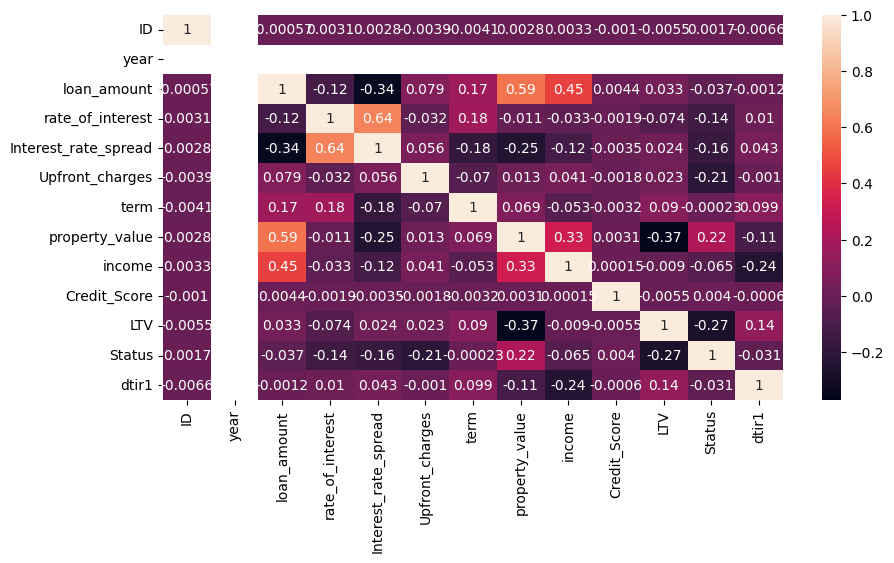

In [58]:
plt.figure(figsize=(10,5))
sns.heatmap(data.select_dtypes(include = np.number).corr(), annot=True)